In [2]:
%matplotlib inline

In [3]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Introduction to Pandas - Reading Data

## Contents
----
- [What is pandas?](#What is pandas?)
    - [SummaryEvent Properties](#SummaryEvent-Properties)
    - [SummaryEvent Class Methods](#SummaryEvent-Class-Methods) 
- [DetailEvent](#DetailEvent)
    - [DetailEvent Properties](#DetailEvent-Properties)
    - [DetailEvent Class Methods](#DetailEvent-Class-Methods) 
- [Product](#Product)
    - [Product Properties](#Product-Properties)
    - [Product Class Methods](#Product-Class-Methods) 

 - What is pandas?
 - How do I get data into pandas?

### What is pandas?

pandas is a Python library that:

 - Creates 1-D and 2-D (like a spreadsheet) table data structures
 - Provides methods for:
     - Doing statistics on these tables
     - Performing data manipulation and cleaning (removing missing data, etc.)
     - Making visualizations of the data
 - Can import/export to comma/tab delimited, Excel, database, etc.

### pandas Series

A Series is a 1-D data structure containing labels (indices) and values. There are reasons to create these on their own, but we'll mostly be looking at them as the columns or rows of a DataFrame.

### pandas DataFrame

A DataFrame is a 2-D tabular data structure whose closest analogue is a spreadsheet. Unlike numpy arrays, DataFrames are explicity organized into rows and columns, each of which are labeled. Each column, again unlike numpy arrays, can have a unique datatype.

In [4]:
# Create a DataFrame from scratch
d = {'Name':['Fred','Wilma','Betty','Barney'],
    'Age':[34,33,33,32]}
df = pd.DataFrame(d)
df

,Name,Age
0,Fred,34
1,Wilma,33
2,Betty,33
3,Barney,32


In [8]:
# Creating DataFrames from scratch is for amateurs, so we'll read in some GPS data from the NEIC website
# This data has been gunzipped. There is no header row, but we can determine by inspection that the 
# first column is time, and the second column is displacement.
# 2005.72553	   0.42	   2.60	2005.00	266.00
# 2005.72827	   0.55	   2.70	2005.00	267.00
# 2005.73101	   0.48	   2.70	2005.00	268.00
# 2005.73374	  -2.00	   2.60	2005.00	269.00
# 2005.73648	  -0.67	   2.70	2005.00	270.00
# 2005.73922	   0.35	   2.70	2005.00	271.00
# 2005.74196	  -1.82	   3.30	2005.00	272.00
north = '/Users/mhearne/Downloads/p189_N.data'
columns = ['time','displacement','U1','U2','U3']
north_data = pd.read_csv(north, sep='\s+', header=None,names=columns)
north_data

,time,displacement,U1,U2,U3
0,2005.72553,0.42,2.6,2005.0,266.0
1,2005.72827,0.55,2.7,2005.0,267.0
2,2005.73101,0.48,2.7,2005.0,268.0
3,2005.73374,-2.00,2.6,2005.0,269.0
4,2005.73648,-0.67,2.7,2005.0,270.0
...,...,...,...,...,...
5110,2019.79124,5.16,2.6,2019.0,290.0
5111,2019.79398,7.59,2.5,2019.0,291.0
5112,2019.79671,6.32,2.5,2019.0,292.0
5113,2019.79945,6.04,2.5,2019.0,293.0


In [9]:
# Let's remove the columns we don't need for this analysis
north_data = north_data.drop(['U1','U2','U3'], axis='columns')
north_data

,time,displacement
0,2005.72553,0.42
1,2005.72827,0.55
2,2005.73101,0.48
3,2005.73374,-2.00
4,2005.73648,-0.67
...,...,...
5110,2019.79124,5.16
5111,2019.79398,7.59
5112,2019.79671,6.32
5113,2019.79945,6.04


In [11]:
# We can load in the other two channels the same way.
east = '/Users/mhearne/Downloads/p189_E.data'
up = '/Users/mhearne/Downloads/p189_U.data'
east_data = pd.read_csv(east, sep='\s+', header=None,names=columns)
up_data = pd.read_csv(up, sep='\s+', header=None,names=columns)
east_data = east_data.drop(['U1','U2','U3'], axis='columns')
up_data = up_data.drop(['U1','U2','U3'], axis='columns')
print(east_data.head())
print(up_data.head())

         time  displacement
0  2005.72553          3.27
1  2005.72827          2.52
2  2005.73101          4.38
3  2005.73374          1.73
4  2005.73648          4.59
         time  displacement
0  2005.72553          2.19
1  2005.72827          2.59
2  2005.73101          5.28
3  2005.73374         10.98
4  2005.73648         10.08


DataFrames can be merged and joined. Let's do that with these three frames. The merge() method takes two dataframes, using the "on" column to find common rows, and labels the other common named columns with "_x" (left DataFrame) and "_y" (right DataFrame). 

In [13]:
all_data = north_data.merge(east_data, on='time', suffixes=('_north','_east'))
all_data = all_data.merge(up_data, on='time')
mapper = {'displacement':'displacement_up'}
all_data = all_data.rename(mapper=mapper,axis=1)
all_data

,time,displacement_north,displacement_east,displacement_up
0,2005.72553,0.42,3.27,2.19
1,2005.72827,0.55,2.52,2.59
2,2005.73101,0.48,4.38,5.28
3,2005.73374,-2.00,1.73,10.98
4,2005.73648,-0.67,4.59,10.08
...,...,...,...,...
5108,2019.79124,5.16,-7.52,0.90
5109,2019.79398,7.59,-8.16,4.00
5110,2019.79671,6.32,-6.91,1.20
5111,2019.79945,6.04,-5.45,1.20


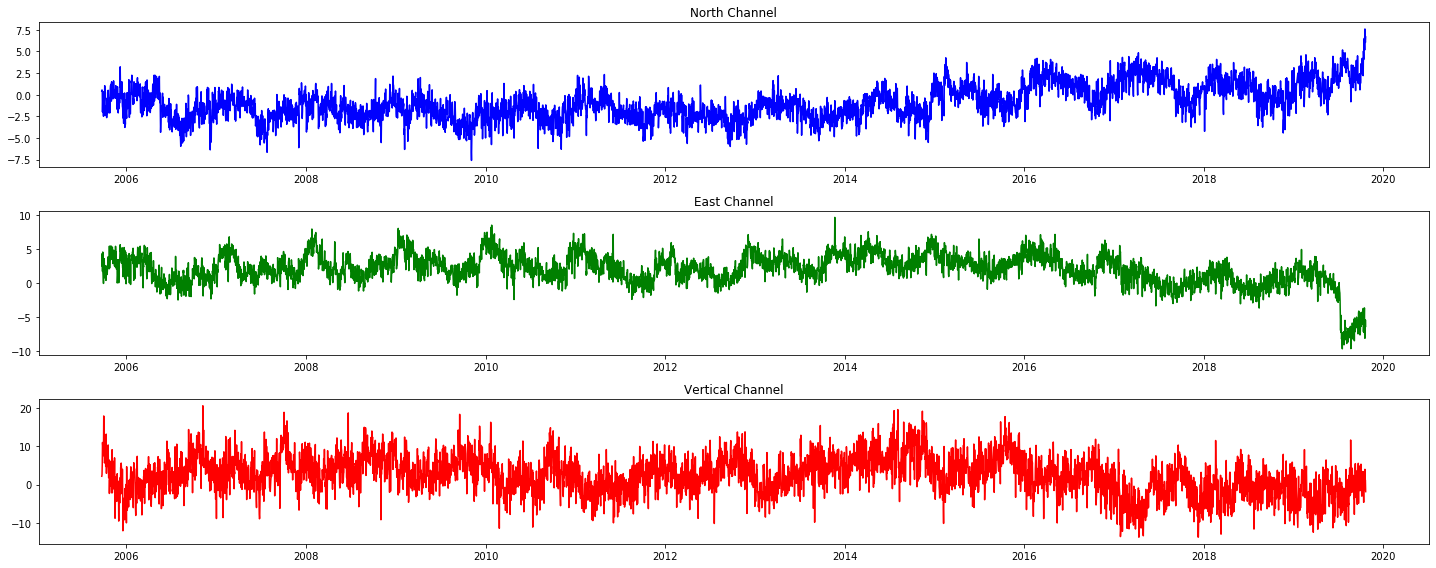

In [14]:
fig, axlist = plt.subplots(3,1, figsize=(20,8));
axlist[0].plot(all_data['time'],all_data['displacement_north'],'b');
axlist[0].set_title('North Channel');
axlist[1].plot(all_data['time'],all_data['displacement_east'],'g');
axlist[1].set_title('East Channel');
axlist[2].plot(all_data['time'],all_data['displacement_up'],'r');
axlist[2].set_title('Vertical Channel');
plt.tight_layout();

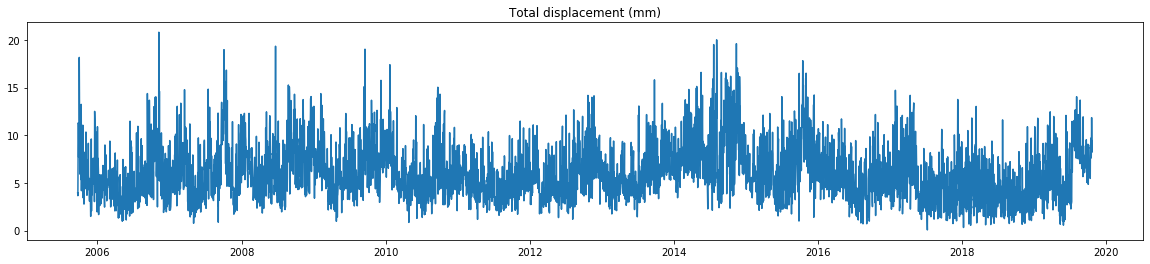

In [47]:
ysq = np.power(all_data['east'],2)
xsq = np.power(all_data['north'],2)
zsq = np.power(all_data['up'],2)
all_data['magnitude'] = np.sqrt(xsq + ysq + zsq)
plt.figure(figsize=(20,4));
plt.plot(all_data['time'],all_data['magnitude']);
plt.title('Total displacement (mm)');